<a href="https://colab.research.google.com/github/AnnyshkaF/High-Performance-Lab/blob/main/task_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SAXPY
SAXPY stands for "Single-Precision A · X Plus Y". This is a function in the Basic Linear Algebra Subprograms (BLAS) library. SAXPY is a combination of scalar multiplication and vector addition.

In [2]:
!curl https://colab.chainer.org/install | sh -

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1580  100  1580    0     0   2925      0 --:--:-- --:--:-- --:--:--  2920
+ apt -y -q install cuda-libraries-dev-10-0
Reading package lists...
Building dependency tree...
Reading state information...
cuda-libraries-dev-10-0 is already the newest version (10.0.130-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
+ pip install -q cupy-cuda100  chainer 
     |████████████████████████████████| 58.9 MB 1.4 MB/s 
     |████████████████████████████████| 1.0 MB 41.0 MB/s 
+ set +ex
Installation succeeded!


In [3]:
import cupy as cp
import numpy as np

cp.cuda.Device()

<CUDA Device 0>

**Difference between cupy and numpy**

CuPy has a concept of the current device, which is the default device on which the allocation, manipulation, calculation etc. of arrays are taken place.
CuPy is a library that implements Numpy arrays on Nvidia GPUs by leveraging the CUDA GPU library. CuPy's interface is a mirror of Numpy and in most cases, it can be used as a direct replacement. If one replaces Numpy code with compatible CuPy code and one might have GPU speedup.

Just like NumPy, CuPy offers 3 basic things:
*   A multidimensional array object, but stored in GPU memory.
*   A ufunc system that follows broadcast rules, but executes in parallel on the GPU.
*   A large library of array functions already implemented with CUDA.
To summirize, CuPy uses GPU to impprove performance, Numpy - CPU.

**How is data transfered?**

We can move data from the CPU to the GPU using the cp.asarray() function:
cupy.asarray() can be used to move a numpy.ndarray, a list, or any object that can be passed to numpy.array() to the current device (GPU).

In [25]:
x_cpu = np.arange(10)
x_gpu = cp.asarray(x_cpu)
print('cpu:', x_cpu)
print('gpu:', x_gpu)
print(x_gpu.device)

cpu: [0 1 2 3 4 5 6 7 8 9]
gpu: [0 1 2 3 4 5 6 7 8 9]
<CUDA Device 0>


If we are done with the data on the GPU, we can convert it back to a NumPy array on the CPU with the cp.asnumpy() function:

In [27]:
x_cpu_returned = cp.asnumpy(x_gpu) 
print(repr(x_cpu_returned))
print(type(x_cpu_returned))

# We can also use cupy.ndarray.get()
x_cpu_returned = x_gpu.get()
print(repr(x_cpu_returned))
print(type(x_cpu_returned))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
<class 'numpy.ndarray'>
array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
<class 'numpy.ndarray'>


**Function saxpy that runs on GPU using cupu is provied**

In [5]:
def np_saxpy(x, y, a):
    return x*a + y

@cp.fuse()
def cp_saxpy(x, y, a):
    return x*a + y

**Graph (computation time vs size of arrays). Plot for numpy and cupy implementations**

In [6]:
np_results = []
for size in np.logspace(1, 4, 20):
    size = int(size)
    np_x = np.random.rand(size, size).astype(np.float32)
    np_y = np.random.rand(size, size).astype(np.float32)
    np_a = np.float32(5.0)
    t = %timeit -o -q np_saxpy(np_x, np_y, np_a);
    np_results.append(t)

In [7]:
cp_results = []
for size in cp.logspace(1, 4, 20):
    size = int(size)
    cp_x = cp.random.rand(size, size).astype(cp.float32)
    cp_y = cp.random.rand(size, size).astype(cp.float32)
    cp_a = cp.float32(2.0)
    t = %timeit -o -q np_saxpy(cp_x, cp_y, cp_a);
    cp_results.append(t)

**Visualize results**

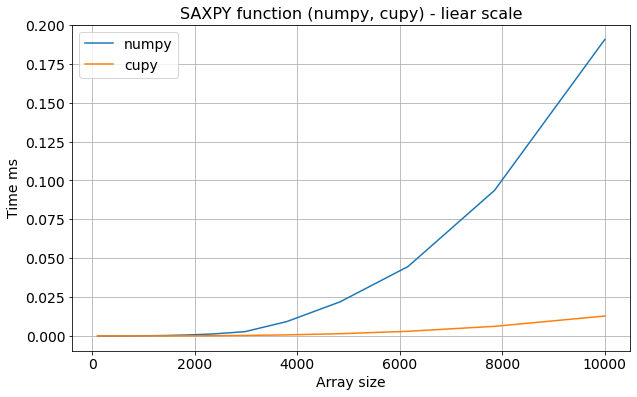

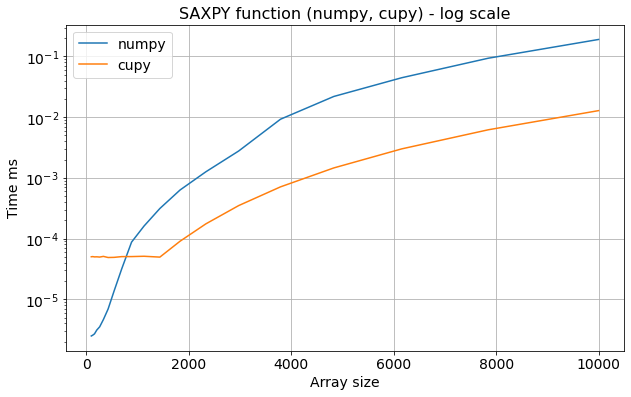

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(np.logspace(2, 4, 20), [i.best for i in np_results])
plt.plot(np.logspace(2, 4, 20), [i.best for i in cp_results])
plt.title('SAXPY function (numpy, cupy) - liear scale', fontsize=16)
#plt.yscale('log')
plt.xlabel('Array size', fontsize=14)
plt.ylabel('Time ms', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['numpy', 'cupy'], fontsize=14);
plt.grid()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(np.logspace(2, 4, 20), [i.best for i in np_results])
plt.plot(np.logspace(2, 4, 20), [i.best for i in cp_results])
plt.title('SAXPY function (numpy, cupy) - log scale', fontsize=16)
plt.yscale('log')
plt.xlabel('Array size', fontsize=14)
plt.ylabel('Time ms', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['numpy', 'cupy'], fontsize=14);
plt.grid()
plt.show()